#### Import all useful libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


/Users/zee/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


#### 1. Read from data file 

In [5]:
df = pd.read_csv('NY_FL_flight_demand.csv')

#### 2. Data Summary

In [16]:
"""
Familiarizing with column names
"""
print('Column Names:{0} \nTotal Rows:{1} '.format(list(df.columns),df.shape[0]))

Column Names:['search_date', 'origin_airport_code', 'origin_city', 'origin_region', 'origin_country', 'dest_airport_code', 'destination_city', 'destination_region', 'destination_country', 'flight_demand'] 
Total Rows:694917 


In [17]:
"""
Find out time duration of data collection
"""
print('Start Date: {0} \nEnd Date: {1}'.format(df['search_date'].min(),df['search_date'].max()))

Start Date: 2016-03-01 
End Date: 2018-03-31


In [18]:
"""
Lets take a peek 
"""
df.head()

,search_date,origin_airport_code,origin_city,origin_region,origin_country,dest_airport_code,destination_city,destination_region,destination_country,flight_demand
0,2016-06-05,ECP,Panama City,FL,US,DEN,Denver,CO,US,135
1,2016-06-05,MIA,Miami,FL,US,BOS,Boston,MA,US,3909
2,2016-06-05,PGD,Punta Gorda,FL,US,JFK,New York,NY,US,15
3,2016-06-05,JAX,Jacksonville,FL,US,WAS,Washington,DC,US,943
4,2016-06-05,EYW,Key West,FL,US,CLT,Charlotte,NC,US,67


In [24]:
"""
Pandas has parsed 'search_date' column as string not datetime, lets remedy that
"""
print("Default dtype: ",type(df['search_date'][0]))
print("Modified dtype: ",type(pd.to_datetime(df['search_date'][0])))



Default dtype:  <class 'str'>
Modified dtype:  <class 'pandas._libs.tslib.Timestamp'>


In [30]:
"""
Converting to datetime will be useful for further operations
"""
df['search_date'] = pd.to_datetime(df['search_date'])
print("Start Date: {0} \nEnd Date: {1}".format(df['search_date'].min(),df['search_date'].max()))

Start Date: 2016-03-01 00:00:00 
End Date: 2018-03-31 00:00:00


In [48]:
"""
Lets analyze the entropy of each column 
Observations: 
1. All flights are domestic
2. Some cities (likely large) have more than one airport
"""

df[df.columns[1:-1]].describe()

,origin_airport_code,origin_city,origin_region,origin_country,dest_airport_code,destination_city,destination_region,destination_country
count,694917,694917,694917,694917,694917,694917,694917,694917
unique,135,97,2,1,36,31,22,1
top,MIA,New York,FL,US,BOS,Chicago,FL,US
freq,19000,57015,402509,694917,29942,55375,86357,694917


### Question 1.

In [53]:
"""
Quick operation to create some dated categorical variables
"""
df.set_index(df['search_date'], inplace=True)
df['DayOfWeek'] = df.index.dayofweek
df['Month'] = df.index.month
df['Year'] = df.index.year
df.reset_index(inplace=True,drop=True)

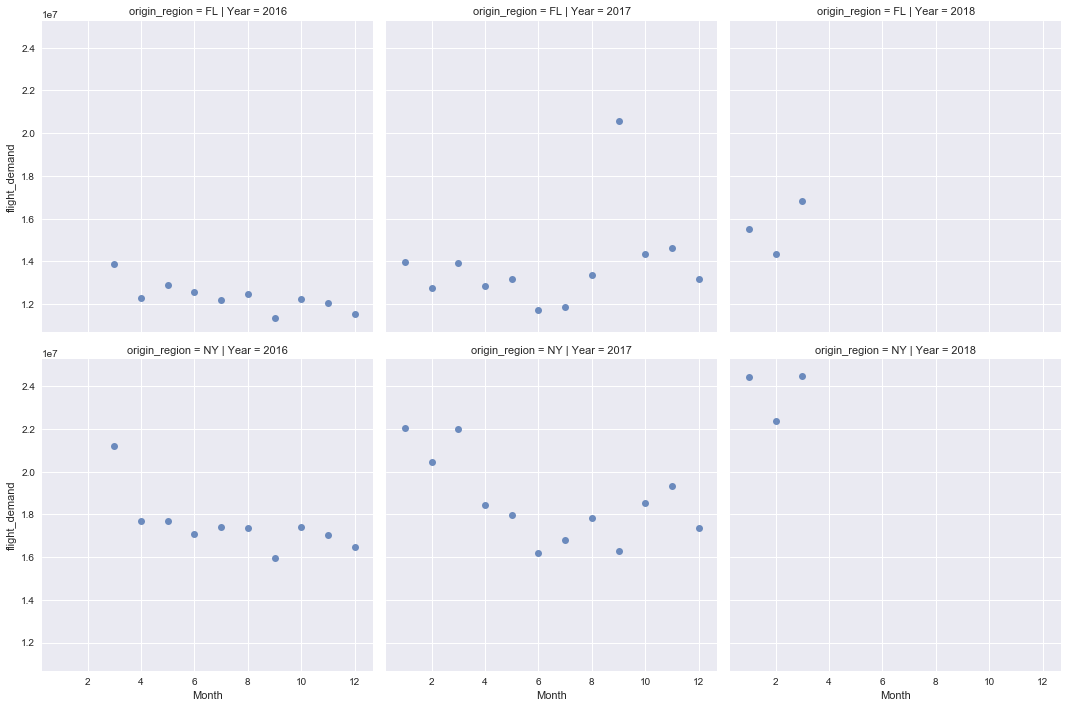

In [63]:
sns.lmplot(data=df.groupby(['origin_region','Year','Month']).sum().reset_index(),
           col='Year',row='origin_region',x='Month',y='flight_demand', fit_reg=False)
plt.show()